## Original 데이터와 fake 데이터 비교 분석
 - Feature histogram distribution
 - PCA components = 2
 - T-sne

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import os

import torch

import warnings
warnings.filterwarnings("ignore") 

In [2]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print(device)

cuda


In [3]:
## Load before 2017 data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/defalut_original_train_before_2017.csv"
data = pd.read_csv(data_path, low_memory=False)

In [4]:
fake_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/tablegan/samples/train/train_OI_11_00_fake.csv"
fake = pd.read_csv(fake_path)
fake['loan_status'] = 1

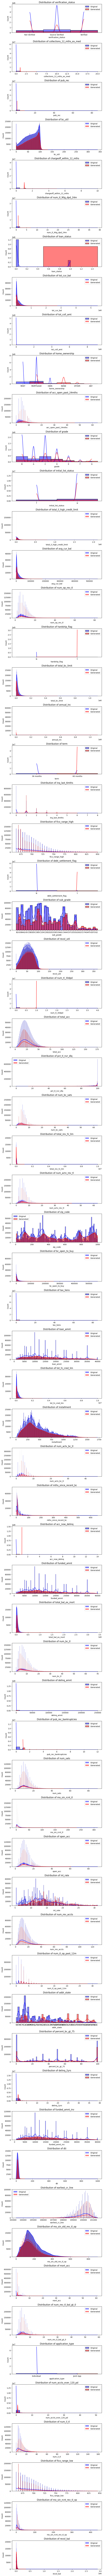

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 원본 데이터와 TableGAN 생성 데이터 불러오기
# 원본 데이터: original_df
# TableGAN이 생성한 데이터: generated_df

# 공통 feature 선택 (혹시 컬럼이 다를 수도 있으니)
common_features = list(set(data.columns) & set(fake.columns))
original_df = data[common_features]
generated_df = fake[common_features]

# ------------------------------
# 1️⃣ 히스토그램 비교 (각 feature 분포)
# ------------------------------
num_features = len(common_features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, num_features * 3))

for i, feature in enumerate(common_features):
    sns.histplot(original_df[feature], color='blue', label='Original', kde=True, ax=axes[i], alpha=0.5)
    sns.histplot(generated_df[feature], color='red', label='Generated', kde=True, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [6]:
# ------------------------------
# 2️⃣ PCA 분석 (2D 시각화)
# ------------------------------
pca = PCA(n_components=2)
original_pca = pca.fit_transform(original_df)
generated_pca = pca.transform(generated_df)

plt.figure(figsize=(8, 6))
plt.scatter(original_pca[:, 0], original_pca[:, 1], color='blue', alpha=0.5, label='Original')
plt.scatter(generated_pca[:, 0], generated_pca[:, 1], color='red', alpha=0.5, label='Generated')
plt.title('PCA: Original vs Generated Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'Not Verified'

In [7]:
# ------------------------------
# 3️⃣ t-SNE 분석 (2D 시각화)
# ------------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
original_tsne = tsne.fit_transform(original_df)
generated_tsne = tsne.fit_transform(generated_df)

plt.figure(figsize=(8, 6))
plt.scatter(original_tsne[:, 0], original_tsne[:, 1], color='blue', alpha=0.5, label='Original')
plt.scatter(generated_tsne[:, 0], generated_tsne[:, 1], color='red', alpha=0.5, label='Generated')
plt.title('t-SNE: Original vs Generated Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'Not Verified'